In [1]:
%matplotlib inline
import networkx as nx
import warnings
warnings.simplefilter("ignore")

## グラフにおけるマッチング

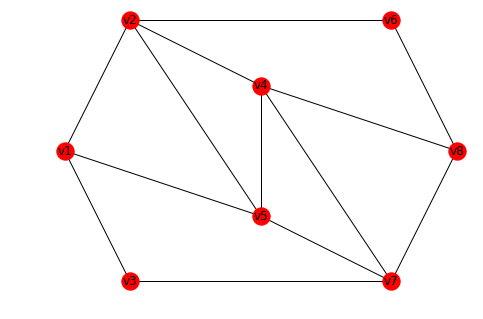

In [2]:
G1 = nx.Graph()
G1.add_nodes_from(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8'])
G1.add_edges_from([('v1', 'v2'), ('v1', 'v3'), ('v1', 'v5'), ('v2', 'v4'), ('v2', 'v5'), \
                   ('v2', 'v6'), ('v3', 'v7'), ('v4', 'v5'), ('v4', 'v7'), ('v4', 'v8'), \
                   ('v5', 'v7'), ('v6', 'v8'), ('v7', 'v8')])
pos1 = {'v1': (0, 0), \
        'v2': (5, 10), \
        'v3': (5, -10), \
        'v4': (15, 5), \
        'v5': (15, -5), \
        'v6': (25, 10), \
        'v7': (25,-10), \
        'v8': (30,0)}
nx.draw(G1, pos=pos1, with_labels=True)

In [3]:
# M が G のマッチングであるか判定する
def is_matching(G, M):
    m_degree = {v:0 for v in G.nodes()}
    for e in M:
        if not (G.has_node(e[0]) and G.has_node(e[1])):
#           print("Edge {0} is not an edge of the input").format(e)
            return False
        if not G.has_edge(*e):
#           print("Edge {0} is not an edge of the input").format(e)
            return False
        if m_degree[e[0]] == 1:
#           print("Vertex {0} is incident to multiple edges").format(e[0])
            return False
        if m_degree[e[1]] == 1:
#           print("Vertex {0} is incident to multiple edges").format(e[0])
            return False
        m_degree[e[0]] += 1
        m_degree[e[1]] += 1
    return True   

In [4]:
M1 = [('v1', 'v2'), ('v4', 'v7'), ('v6', 'v8')]

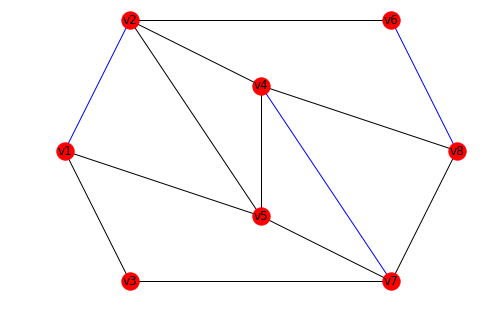

In [5]:
def edgecolor(graph, edgelist, color):
    return list(map(lambda e: color if e in edgelist or e[::-1] in edgelist else 'black', graph.edges()))
nx.draw(G1, pos=pos1, edge_color = edgecolor(G1, M1, 'blue'), with_labels=True)

In [6]:
is_matching(G1, M1)

True

In [7]:
M2 = [('v1', 'v3'), ('v2', 'v5'), ('v2', 'v6')]

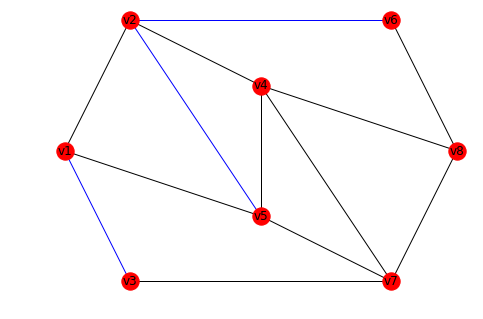

In [8]:
nx.draw(G1, pos=pos1, edge_color = edgecolor(G1, M2, 'blue'), with_labels=True)

In [9]:
is_matching(G1, M2)

False

In [10]:
# M が G の極大マッチングであるか判定する
def is_maximal_matching(G, M):
    if not is_matching(G, M):
        print("The input is not a matching".format(e))
        return False
    for e in G.edges():
        if e in M:
            continue
        M.append(e)
        if is_matching(G, M):
            print("Adding {0} results in a matching".format(e))
            return False
        M.remove(e)
    return True    

In [11]:
is_maximal_matching(G1, M1)

True

In [12]:
M3 = [('v1', 'v2'), ('v3', 'v7'), ('v6', 'v8')]

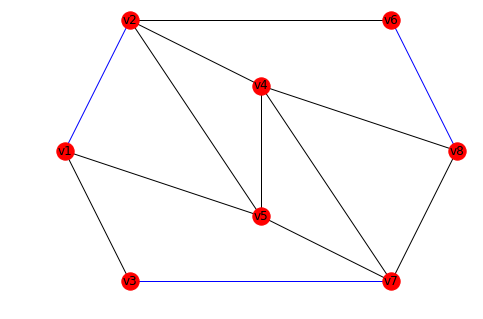

In [13]:
nx.draw(G1, pos=pos1, edge_color = edgecolor(G1, M3, 'blue'), with_labels=True)

In [14]:
is_maximal_matching(G1, M3)

Adding ('v4', 'v5') results in a matching


False

In [15]:
# M が G の完全マッチングであるか判定する
def is_perfect_matching(G, M):
    m_degree = {v:0 for v in G.nodes()}
    for e in M:
        if not (G.has_node(e[0]) and G.has_node(e[1])):
            return False
        if not G.has_edge(*e):
            return False
        if m_degree[e[0]] == 1 or m_degree[e[1]] == 1:
            return False
        m_degree[e[0]] += 1
        m_degree[e[1]] += 1
    for v in G.nodes():
        if m_degree[v] == 0:
            return False 
    return True   

In [16]:
is_perfect_matching(G1, M1)

False

In [17]:
M4 = [('v1', 'v2'), ('v3', 'v7'), ('v4', 'v5'), ('v6', 'v8')]
is_perfect_matching(G1, M4)

True

In [18]:
# グラフの頂点数は，その完全マッチングの辺数の2倍に等しい
nx.number_of_nodes(G1) == len(M4) * 2

True

In [19]:
# 最大マッチングの計算 (結果は辞書)
M5 = nx.max_weight_matching(G1)
M5

{('v1', 'v5'), ('v6', 'v2'), ('v7', 'v3'), ('v8', 'v4')}

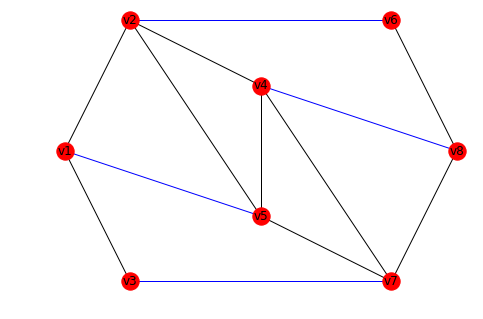

In [20]:
nx.draw(G1, pos=pos1, edge_color = edgecolor(G1, M5, 'blue'), with_labels=True)

## 最大マッチングと最小頂点被覆

In [21]:
# C が G の頂点被覆であるか判定する
def is_vertex_cover(G, C):
    for v in C:
        if not G.has_node(v):
            return False
    for e in G.edges():
        if not (e[0] in C or e[1] in C):
            print("Edge {0} is not covered".format(e))
            return False
    return True          

In [22]:
C1 = ['v2', 'v3', 'v4', 'v5', 'v6', 'v7']

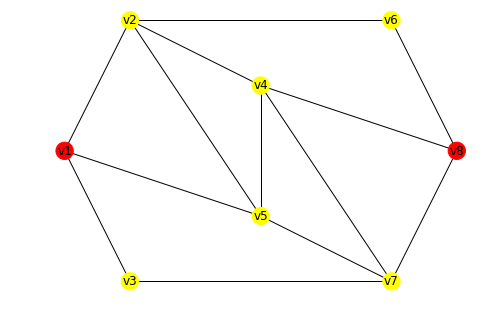

In [23]:
def nodecolor(graph, nodelist, color):
    return list(map(lambda v: color if v in nodelist else 'red', graph.nodes()))
nx.draw(G1, pos=pos1, node_color = nodecolor(G1, C1, 'yellow'), with_labels=True)

In [24]:
is_vertex_cover(G1, C1)

True

In [25]:
C2 = ['v1', 'v2', 'v3', 'v5', 'v8']

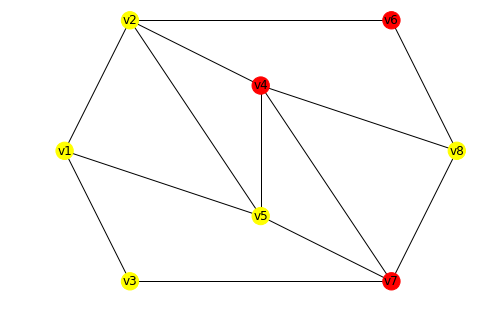

In [26]:
nx.draw(G1, pos=pos1, node_color = nodecolor(G1, C2, 'yellow'), with_labels=True)

In [27]:
is_vertex_cover(G1, C2)

Edge ('v4', 'v7') is not covered


False

## Hallの結婚定理

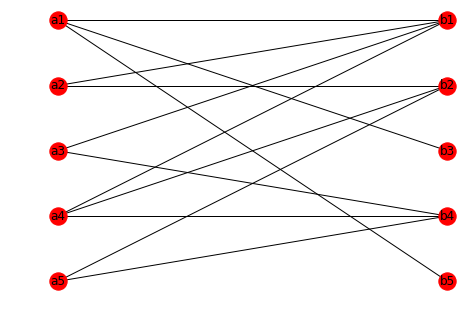

In [28]:
G2 = nx.Graph()
G2.add_nodes_from(['a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5'])
G2.add_edges_from([('a1', 'b1'), ('a1', 'b3'), ('a1', 'b5'), \
                   ('a2', 'b1'), ('a2', 'b2'), \
                   ('a3', 'b1'), ('a3', 'b4'), \
                   ('a4', 'b1'), ('a4', 'b2'), ('a4', 'b4'), \
                   ('a5', 'b2'), ('a5', 'b4')])
pos2 = {'a1': (0, 20), \
        'a2': (0, 15), \
        'a3': (0, 10), \
        'a4': (0, 5), \
        'a5': (0, 0), \
        'b1': (5, 20), \
        'b2': (5, 15), \
        'b3': (5, 10), \
        'b4': (5, 5), \
        'b5': (5, 0)}
nx.draw(G2, pos=pos2, with_labels=True)

In [29]:
M6 = nx.max_weight_matching(G2)
M6

{('a2', 'b2'), ('a3', 'b4'), ('a4', 'b1'), ('b5', 'a1')}

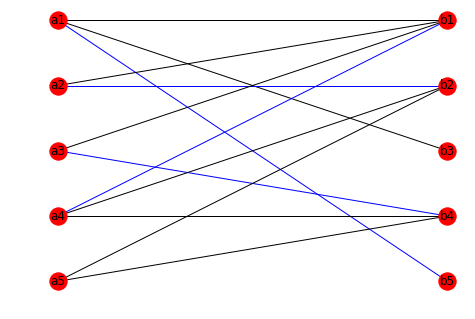

In [30]:
nx.draw(G2, pos=pos2, edge_color = edgecolor(G2, M6, 'blue'), with_labels=True)

In [31]:
# 二部グラフの最小頂点被覆
C3 = nx.bipartite.to_vertex_cover(G2, nx.bipartite.maximum_matching(G2))

In [32]:
C3

{'a1', 'b1', 'b2', 'b4'}

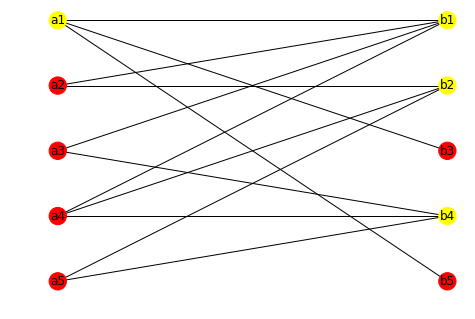

In [33]:
nx.draw(G2, pos=pos2, node_color = nodecolor(G2, C3, 'yellow'), with_labels=True)

In [34]:
# 二部グラフに完全マッチングが存在しない場合，結婚条件を満たさない頂点集合を返す
def non_marriage_certificate(graph):
    left, right = nx.bipartite.sets(graph)
    mvc = nx.bipartite.to_vertex_cover(graph, nx.bipartite.maximum_matching(graph))
    s = []
    for v in left:
        if v not in mvc:
            s.append(v)
    for v in right:
        if v in mvc:
            s.append(v)
    return s
C4 = non_marriage_certificate(G2)

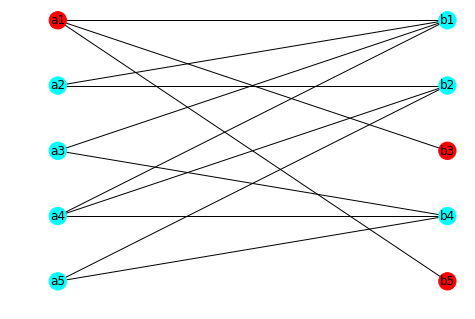

In [35]:
nx.draw(G2, pos=pos2, node_color = nodecolor(G2, C4, 'cyan'), with_labels=True)